# EE769 Assignment-2 
**Mirza Aman Baig(213230007)
Rohan Appaso More(213230013)**

**Assignment-2:** Comparison of classifiers.

**Objective:** Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not. 
Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular 
behavior or not (treatment_behavior). Readings for 77 proteins were recorded for the mice, but some of the 
readings were discarded if they seemed unreliable (out of range).
Our objective here is to develop a pre-processing pipeline by exploratory data analysis and develop a classifier. We also want to know which protein type is important in pridiction of the different classes.Using five-fold cross-validation we want to find reasonable hyper-parameter settings for the following model types:
a. Elastic net logistic regression (L1 and L2 weight)
b. Neural network with single ReLU hidden layer and Softmax output (number of neurons, weight 
decay)
c. SVM (a few kernels, their hyper-parameters such as width, and slack penalty)
d. Random forest (number of trees, max tree depth, max number of variables per node)

In [188]:
#importing some important useful libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
#importing training data
train_df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")

In [190]:
#importing testing data
test_df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")

In [191]:
test_df.shape

(225, 79)

In [192]:
train_df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


In [193]:
print(train_df.shape)

(762, 79)


We can see that only "Genotype" and "Treatment_Behavior" columns have categorical data.

In [194]:
#checking the unique values
for col in train_df.columns.values:
  list_vals = pd.unique(train_df[col])
  print(col + " is of type " + str(train_df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(train_df[col].isnull().sum(axis=0)) + " null entries")
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:len(list_str)-1])

DYRK1A_N is of type float64 has 762 unique values, and 0 null entries
ITSN1_N is of type float64 has 761 unique values, and 0 null entries
BDNF_N is of type float64 has 762 unique values, and 0 null entries
NR1_N is of type float64 has 762 unique values, and 0 null entries
NR2A_N is of type float64 has 762 unique values, and 0 null entries
pAKT_N is of type float64 has 762 unique values, and 0 null entries
pBRAF_N is of type float64 has 760 unique values, and 0 null entries
pCAMKII_N is of type float64 has 762 unique values, and 0 null entries
pCREB_N is of type float64 has 762 unique values, and 0 null entries
pELK_N is of type float64 has 762 unique values, and 0 null entries
pERK_N is of type float64 has 762 unique values, and 0 null entries
pJNK_N is of type float64 has 761 unique values, and 0 null entries
PKCA_N is of type float64 has 762 unique values, and 0 null entries
pMEK_N is of type float64 has 762 unique values, and 0 null entries
pNR1_N is of type float64 has 762 unique 

1. ELK_N has 15 null values
2. MEK_N has 4 null values              
3. Bcatenin_N has 15 null values           
4. BAD_N has 180 null values.                 
5. BCL2_N has 195 null values.        
6. PCFOS_N has 60 null values.          
7. H3ACK18_N has 150 null values                 
8. EGR1_N has 180 null values.      
9. H3MeK4_N has 180 null values

In [195]:
print(train_df.shape[0] - train_df.dropna().shape[0])
print("useful data = "+ str(((train_df.shape[0] - train_df.dropna().shape[0])/train_df.shape[0])*100)+ " % of the total data" )

375
useful data = 49.21259842519685 % of the total data


Hence, only 49.2125% of the data is complete , all other data has atleast one of its values missing. <br>
Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

**To check how different classes are balanced**

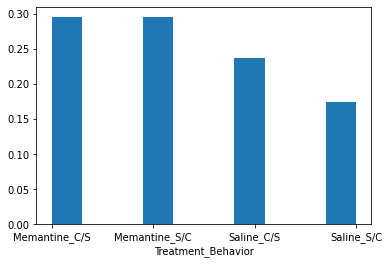

Memantine_C/S: 29.527559055118136 %
Memantine_S/C: 29.527559055118026 %
Saline_C/S: 23.622047244095114 %
Saline_S/C: 17.32283464566975 %


In [196]:
weights=np.zeros_like(train_df['Treatment_Behavior']) + 1. / (train_df['Treatment_Behavior']).size
n = plt.hist(train_df['Treatment_Behavior'], weights=weights)
plt.xlabel('Treatment_Behavior')
plt.show()
print("Memantine_C/S: " + str(n[0][0]*100) + " %")
print("Memantine_S/C: " + str(n[0][3]*100) + " %")
print("Saline_C/S: " + str(n[0][6]*100) + " %")
print("Saline_S/C: " + str(n[0][9]*100) + " %")

Above we can see the prior probability distribution of different classes of Treatment_Behavior.

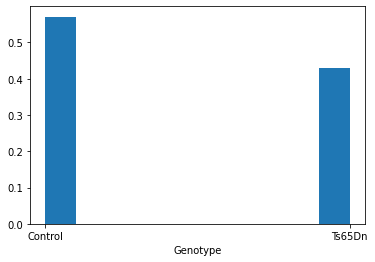

Control: 57.086614173228234 %
Ts65Dn: 42.91338582677279 %


In [197]:
weights=np.zeros_like(train_df['Genotype']) + 1. / (train_df['Genotype']).size
n = plt.hist(train_df['Genotype'], weights=weights)
plt.xlabel('Genotype')
plt.show()
print("Control: " + str(n[0][0]*100) + " %")
print("Ts65Dn: " + str(n[0][9]*100) + " %")

Above we can see the prior probability distribution of different classes of Genotype.

# Exploratory Data analysis:

In [198]:
# collection of numeric type features into num_df dataframe
num_df = train_df.select_dtypes(include=['int64','float64']).copy()
num_df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


**Generating HEATMAP for correlating matrix**

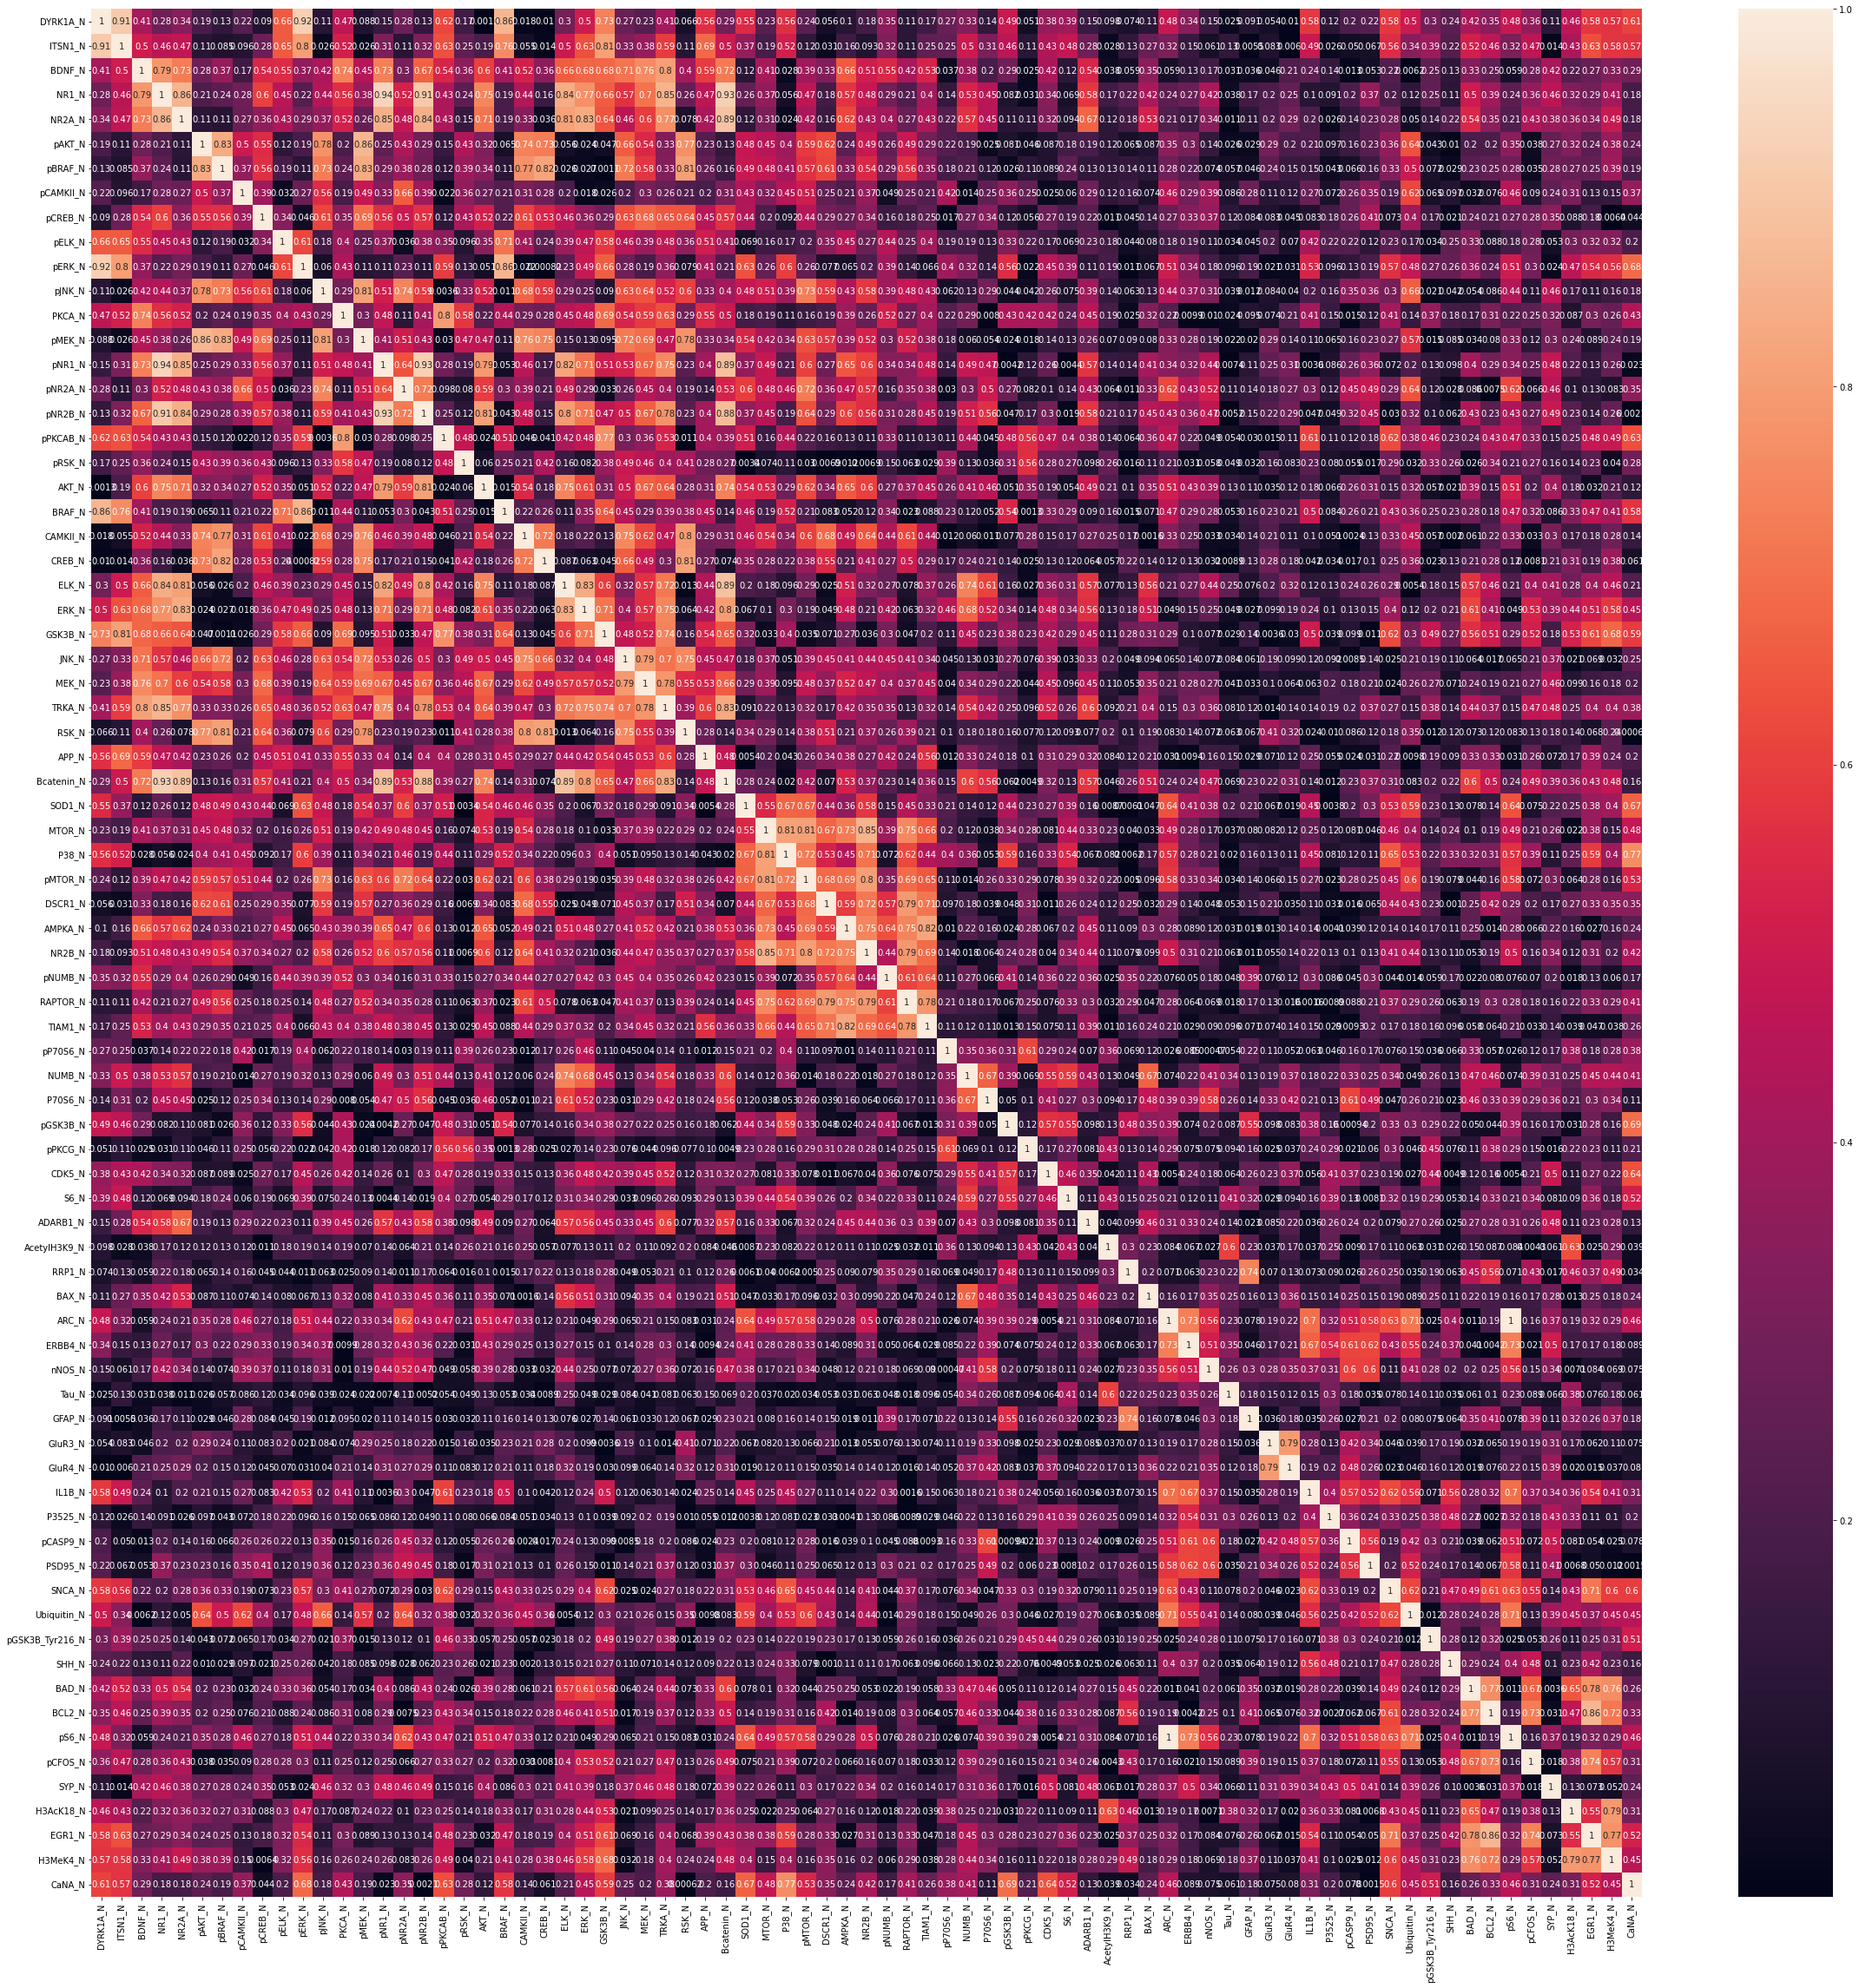

In [199]:
corrMatrix = num_df.corr(method= 'spearman')
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(abs(corrMatrix), annot = True)
plt.show()

In the above correlation matrix we can see that ARC_N and pS6_N are highly correlated so we can drop one of them. Here we are dropping pS6_N


So now we are creating a square matrix with dimensions equal to the number of features. In which we will have the elements as the absolute value of correlation between the features.

In [200]:
cor_matrix = num_df.corr().abs()
print(cor_matrix)

           DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
DYRK1A_N   1.000000  0.961321  0.407110  0.314795  0.340011  0.182126   
ITSN1_N    0.961321  1.000000  0.495102  0.428745  0.421034  0.149509   
BDNF_N     0.407110  0.495102  1.000000  0.817986  0.746004  0.241501   
NR1_N      0.314795  0.428745  0.817986  1.000000  0.866667  0.185322   
NR2A_N     0.340011  0.421034  0.746004  0.866667  1.000000  0.076446   
...             ...       ...       ...       ...       ...       ...   
SYP_N      0.035929  0.039384  0.454025  0.486483  0.377628  0.199349   
H3AcK18_N  0.406055  0.354554  0.207555  0.253118  0.292016  0.317508   
EGR1_N     0.324198  0.403525  0.247121  0.287997  0.326056  0.313131   
H3MeK4_N   0.518361  0.558266  0.331191  0.404977  0.468892  0.372945   
CaNA_N     0.457907  0.495085  0.304098  0.205033  0.185840  0.245944   

            pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
DYRK1A_N   0.085401   0.158167  0.082463  0.

Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular

In [201]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

           DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
DYRK1A_N        NaN  0.961321  0.407110  0.314795  0.340011  0.182126   
ITSN1_N         NaN       NaN  0.495102  0.428745  0.421034  0.149509   
BDNF_N          NaN       NaN       NaN  0.817986  0.746004  0.241501   
NR1_N           NaN       NaN       NaN       NaN  0.866667  0.185322   
NR2A_N          NaN       NaN       NaN       NaN       NaN  0.076446   
...             ...       ...       ...       ...       ...       ...   
SYP_N           NaN       NaN       NaN       NaN       NaN       NaN   
H3AcK18_N       NaN       NaN       NaN       NaN       NaN       NaN   
EGR1_N          NaN       NaN       NaN       NaN       NaN       NaN   
H3MeK4_N        NaN       NaN       NaN       NaN       NaN       NaN   
CaNA_N          NaN       NaN       NaN       NaN       NaN       NaN   

            pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
DYRK1A_N   0.085401   0.158167  0.082463  0.

C:\Users\rohan\AppData\Local\Temp/ipykernel_24520/3477284062.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


So we are selecting the columns which are having absolute correlation greater than 0.9 and making a list of those columns named 'to_drop'.

In [202]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(); print(to_drop)


['ITSN1_N', 'pERK_N', 'pNR1_N', 'pNR2B_N', 'BRAF_N', 'Bcatenin_N', 'pS6_N']


Reference: https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

Now we are dropping the columns from 'to_drop' which are highly correlated

In [203]:
num_df=num_df.drop(['ITSN1_N', 'pERK_N', 'pNR1_N', 'pNR2B_N', 'BRAF_N', 'Bcatenin_N', 'pS6_N'], axis=1)

In [204]:
num_df.head()

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,...,0.831557,0.188852,0.122652,NaN,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,...,0.849270,0.200404,0.116682,NaN,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,...,0.846709,0.193685,0.118508,NaN,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,...,0.833277,0.192112,0.132781,NaN,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,...,0.878668,0.205604,0.129954,NaN,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


Now we are replacing all NaN values with mean.

**Data Imputation**

In [205]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(num_df)
num_df = pd.DataFrame(imputed, columns=num_df.columns)


**Iterative Imputation**
Useful only when working with multivariate data, the IterativeImputer in scikit-learn utilizes the data available in other features in order to estimate the missing values being imputed
  
  reference: https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38

In [206]:
#checking the null values in our dataset
num_df.isna().sum()

DYRK1A_N     0
BDNF_N       0
NR1_N        0
NR2A_N       0
pAKT_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 70, dtype: int64

In [207]:
test_df1=test_df.drop(['ITSN1_N', 'pERK_N', 'pNR1_N', 'pNR2B_N', 'BRAF_N', 'Bcatenin_N', 'pS6_N'], axis=1)

In [208]:
test_df2=test_df1.drop(['Genotype','Treatment_Behavior'],axis=1)
test_df2.shape

(225, 70)

In [209]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(test_df2)
test_df3 = pd.DataFrame(imputed, columns=test_df2.columns)

In [210]:
#checking the null values in our test dataset
test_df3.isna().sum()
test_df3=test_df3.join(test_df['Genotype'])
test_df3=test_df3.join(test_df['Treatment_Behavior'])

In [211]:
test_df4=test_df3.drop(['Genotype','Treatment_Behavior'],axis=1)
test_df4.shape

(225, 70)

As there is no null value we can proceed

**Now adding output columns to our data to perform classification**

In [212]:
num_df=num_df.join(train_df['Genotype'])


In [213]:
num_df=num_df.join(train_df['Treatment_Behavior'])
num_df

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,...,0.122652,0.111739,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,...,0.116682,0.112247,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,...,0.118508,0.111092,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,...,0.132781,0.120551,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,...,0.129954,0.120262,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.317851,...,0.156371,0.110916,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.329786,...,0.153224,0.110350,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.354545,...,0.166417,0.133664,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.325819,...,0.158631,0.136994,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


In [214]:
num_df.isna().sum()

DYRK1A_N              0
BDNF_N                0
NR1_N                 0
NR2A_N                0
pAKT_N                0
                     ..
EGR1_N                0
H3MeK4_N              0
CaNA_N                0
Genotype              0
Treatment_Behavior    0
Length: 72, dtype: int64

In [215]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
num_df['Genotype']= label_encoder.fit_transform(num_df['Genotype'])
num_df['Treatment_Behavior']= label_encoder.fit_transform(num_df['Treatment_Behavior'])

Here we will tranform Two categorical columns and ecode them in integers for easy classification

In [216]:
num_df

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,...,0.122652,0.111739,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,...,0.116682,0.112247,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,...,0.118508,0.111092,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,...,0.132781,0.120551,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,...,0.129954,0.120262,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.317851,...,0.156371,0.110916,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,1,3
758,0.401739,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.329786,...,0.153224,0.110350,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,1,3
759,0.382182,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.354545,...,0.166417,0.133664,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,1,3
760,0.365622,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.325819,...,0.158631,0.136994,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,1,3


In [217]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_df3['Genotype']= label_encoder.fit_transform(test_df3['Genotype'])
test_df3['Treatment_Behavior']= label_encoder.fit_transform(test_df3['Treatment_Behavior'])

In [218]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(num_df.drop(['Genotype','Treatment_Behavior'],axis=1))
train_X = pd.DataFrame(scaler.transform(num_df.drop(['Genotype','Treatment_Behavior'],axis=1)))

X=train_X
display(train_X)


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.239745,2.372452,1.471921,2.269552,-0.351734,-0.186528,-0.898820,0.648744,0.595213,-0.148771,...,-0.158189,-1.269701,-1.193053,-0.895409,-0.907487,-0.371984,-0.725426,-1.246045,-1.442720,0.943046
1,0.279648,1.976690,1.393675,1.940975,-0.533878,-0.365510,-0.963191,0.479587,0.292333,-0.292219,...,0.025901,-0.878703,-1.384937,-0.879113,-1.079968,-0.139388,-0.758520,-1.176220,-1.391014,1.144768
2,0.259888,2.117287,1.095124,1.873152,-0.600347,-0.256006,-0.970144,0.585066,0.223626,-0.444364,...,-0.000721,-1.106122,-1.326244,-0.916217,-0.998291,-0.232612,-0.759587,-1.212917,-1.456021,1.687436
3,0.015969,0.833934,0.452418,1.181185,-0.249043,-0.228099,-1.073520,-0.163587,0.289803,-0.337665,...,-0.140312,-1.159352,-0.867478,-0.612215,-0.781955,-0.940673,-0.541428,-0.916111,-1.112796,1.016991
4,-0.010091,0.837716,0.157224,0.900303,-0.496664,-0.334981,-1.087947,-0.641792,0.111757,-0.528799,...,0.331411,-0.702678,-0.958348,-0.621512,-0.806325,-0.258680,-0.681868,-1.066383,-1.086726,1.430089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.158354,-0.070527,-0.606540,-0.611634,0.045756,0.683866,-0.240028,0.313292,-0.447289,0.075654,...,1.606940,-0.346465,-0.109259,-0.921869,-0.597271,-0.145392,-0.328622,-0.942509,-0.341027,0.345848
758,-0.130826,0.042935,-0.373432,-0.507093,0.096829,0.313293,-0.101537,0.638293,-0.385489,0.309205,...,2.043400,-0.563470,-0.210387,-0.940073,-0.881400,-0.085877,-0.273696,-0.866502,-0.212989,0.470936
759,-0.201944,-0.027925,-0.700047,-0.871242,0.681455,0.761884,-0.399737,0.366285,-0.388938,0.793714,...,1.060202,-0.510605,0.213647,-0.190815,-0.637250,-0.441216,-0.329180,-0.574571,-0.331664,0.224291
760,-0.262164,-0.469880,-0.895755,-1.183635,0.319300,0.296632,-0.445606,0.174685,-0.528465,0.231584,...,1.549577,-0.979130,-0.036599,-0.083785,-0.379239,0.154848,-0.347480,-1.059525,0.068276,0.550098


In [219]:
Y=np.array(num_df.loc[:,'Genotype':'Treatment_Behavior'])
Y.shape

(762, 2)

In [220]:
# train and validation split on train_df dataframe
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train,Y_validation = train_test_split(X,Y,test_size=0.2, random_state=42)

In [313]:
X_test1_model1=X_validation
Y_test1_model1=Y_validation[:,0]

In [221]:
X_train1=X_train

**Five fold Crossvalidation for hyper parameter tuning**  
  # Elastic net logistic regression (L1 and L2 weight)


In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# define the elasctic net  logistic regression model
model = LogisticRegression(C=0.6, penalty="elasticnet", solver="saga", l1_ratio=0.2,max_iter=100)
# define the 5-fold cross validation procedure
cv = KFold(n_splits=5,shuffle=False)
# evaluate the model and collect the scores
train_Y1 =Y_train[:,0]
n_scores = cross_val_score(model, X_train, train_Y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy for Genotype:' + str(np.mean(n_scores)))# + str(np.std(n_scores)))
train_Y2 =Y_train[:,1]
n_scores = cross_val_score(model, X_train, train_Y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy for Treatment_Behavior:' + str(np.mean(n_scores))) #+ str(np.std(n_scores)))

Mean Accuracy for Genotype:0.9687847175179515
Mean Accuracy for Treatment_Behavior:0.9819536648150656


In [223]:
# Training on the entire data set
train_Y1 =Y_train[:,0]
clf = LogisticRegression(C=1, penalty="elasticnet", solver="saga", l1_ratio=0.2,max_iter = 100).fit(X_train, train_Y1)
y_lr1 = clf.predict(X_train)
clf.score(X_train, np.ravel(train_Y1))

c:\users\rohan\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.986863711001642

In [224]:
clf = LogisticRegression(C=1, penalty="elasticnet", solver="saga", l1_ratio=0.2,max_iter = 100).fit(X_train, train_Y2)
y_lr2 = clf.predict(X_train)
clf.score(X_train, np.ravel(train_Y2))

c:\users\rohan\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1.0

In [225]:
prediction = clf.predict(X_train)
np.savetxt('test_df',prediction, delimiter=',')


In [226]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_Y1, prediction)*100)

31.03448275862069


Feature: 0, Score: 0.32118
Feature: 1, Score: 0.44787
Feature: 2, Score: 0.18200
Feature: 3, Score: 0.71136
Feature: 4, Score: -0.24832
Feature: 5, Score: 0.48797
Feature: 6, Score: 0.26597
Feature: 7, Score: -0.61071
Feature: 8, Score: -0.07859
Feature: 9, Score: 0.31729
Feature: 10, Score: 0.19111
Feature: 11, Score: 0.00607
Feature: 12, Score: -0.35525
Feature: 13, Score: -0.21775
Feature: 14, Score: 0.11743
Feature: 15, Score: -0.03885
Feature: 16, Score: -0.97891
Feature: 17, Score: -0.05953
Feature: 18, Score: -0.19050
Feature: 19, Score: -0.04841
Feature: 20, Score: -0.05783
Feature: 21, Score: 0.33787
Feature: 22, Score: -0.64579
Feature: 23, Score: 0.65227
Feature: 24, Score: -0.52051
Feature: 25, Score: 0.81993
Feature: 26, Score: -1.11630
Feature: 27, Score: 0.08245
Feature: 28, Score: -0.16751
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.30827
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.32545
Feature: 34, Score: -0.37764
Feature: 35, S

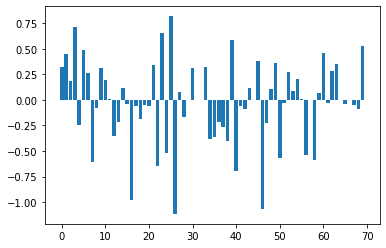

In [227]:
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

According to Elastic net logistic regression TRKA_N, APP_N, DSCR1_N, TIAM1_N, NUMB_N, P70S6_N, pPKCG_N, ERBB4_N, Ubiqitin_N and CaNA_N are some of the features with high importance

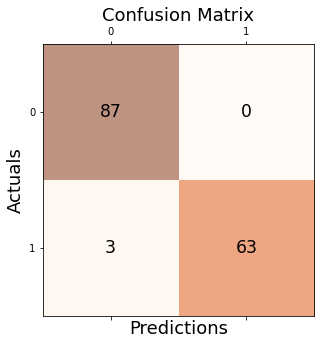

In [228]:
from sklearn.metrics import confusion_matrix
ENLR = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000)
ENLR.fit(X_train1, train_Y1)
y_pred = ENLR.predict(X_validation)
conf_matrix = confusion_matrix(y_true=Y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [229]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
print('Precision: %.3f' % precision_score(Y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(Y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(Y_validation[:,0], y_pred))

Precision: 1.000
Recall: 0.955
Accuracy: 0.980
F1 Score: 0.977


Reference: https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

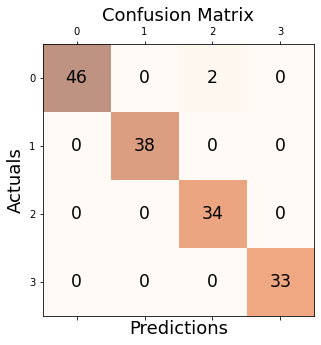

In [230]:
from sklearn.metrics import confusion_matrix
ENLR = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000)
ENLR.fit(X_train1, train_Y2)
y_pred = ENLR.predict(X_validation)
conf_matrix = confusion_matrix(y_true=Y_validation[:,1], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [231]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
print('Precision: %.3f' % precision_score(Y_validation[:,1], y_pred, average='macro'))
print('Recall: %.3f' % recall_score(Y_validation[:,1], y_pred, average='macro'))
print('Accuracy: %.3f' % accuracy_score(Y_validation[:,1], y_pred))
print('F1 Score: %.3f' % f1_score(Y_validation[:,1], y_pred,average='macro'))

Precision: 0.986
Recall: 0.990
Accuracy: 0.987
F1 Score: 0.988


In [232]:
scaler = preprocessing.StandardScaler() # For data normalization

#cols to retain 
scaler.fit(test_df4)
test_X0 = pd.DataFrame(scaler.transform(test_df4))

display(test_X0)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,1.100803,2.583259,1.974701,2.394221,-0.582594,0.365164,-1.376292,0.822835,1.063762,0.799950,...,-0.175553,-0.516397,-0.928164,-0.395454,-0.483470,1.412221,-0.816973,-0.683123,-1.417988,1.208813
1,1.225392,2.915630,2.144586,2.459251,-0.467399,0.462236,-1.332976,1.602315,1.480666,0.891099,...,-0.121121,-0.142017,-0.703301,0.017784,-0.182021,1.207686,-0.702899,-0.570110,-1.502270,1.168194
2,1.189037,3.009620,2.367066,2.407598,-0.413003,0.263538,-1.357593,1.595749,1.992142,1.027922,...,-0.492996,0.037499,-1.021268,-0.480628,-0.174812,0.969971,-0.791922,-0.636428,-1.670078,0.894561
3,0.788419,1.595803,1.086687,2.278297,-0.106337,0.172848,-0.821312,0.149973,0.860422,0.600804,...,-0.053447,-0.664581,-0.379909,-0.593641,-0.230526,1.686461,-0.784626,-0.725633,-1.005223,1.327924
4,0.887416,1.923244,1.501161,2.493537,0.022067,0.493524,-0.757459,0.423275,1.159789,0.797563,...,0.061378,-0.447700,-0.294523,0.544788,-0.464649,1.326581,-0.541685,-0.208447,-1.010342,1.247124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-1.008066,-1.076567,-2.055177,-2.001432,-0.802076,-0.871643,-0.956547,-1.124435,-1.772423,-1.198332,...,0.051741,1.798059,1.524453,1.165890,0.026967,-0.475503,1.571130,0.920048,1.854167,-0.598727
221,-0.828023,-0.560376,-1.470007,-1.571760,-0.106214,0.041258,-0.655581,-0.581492,-1.381017,-0.678946,...,-0.127213,1.624208,1.052008,0.918858,-0.069003,-0.377369,1.577269,0.784200,1.174243,-0.677766
222,-1.064726,-1.205792,-2.411096,-2.134322,-0.600705,-0.783159,-1.219725,-1.200692,-1.907260,-1.385824,...,-0.102598,2.196109,1.822131,1.776639,0.482846,-0.059510,2.175797,1.424919,2.274738,-0.667209
223,-1.084540,-1.254841,-2.367244,-2.050418,-0.661345,-1.058192,-1.231263,-1.403294,-1.765824,-1.408790,...,-0.128166,1.843362,1.567693,2.040130,0.708795,-0.540583,1.950845,1.400374,2.348434,-0.776149


In [233]:
y_out = clf.predict(test_X0)
y_out

array([2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 1, 3, 3,
       3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

In [234]:
output_df = pd.DataFrame(y_out, columns =['treatment behavior'])
output_df = output_df.replace({'treatment behavior':{0:'Memantine_C/S', 1:'Memantine_S/C', 2:'Saline_C/S',3:'Saline_S/C' }})
output_df

,treatment behavior
0,Saline_C/S
1,Saline_C/S
2,Saline_C/S
3,Memantine_C/S
4,Saline_C/S
...,...
220,Saline_S/C
221,Saline_S/C
222,Saline_S/C
223,Saline_S/C


# SVM

In [235]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
# define the SVM model
modelSV = SVC(kernel='linear', C=1.0, gamma='auto')
# define the 5-fold cross validation procedure
cv = KFold(n_splits=5,shuffle=False)
# evaluate the model and collect the scores
train_Y1 =Y_train[:,0]
n_scores = cross_val_score(modelSV, X_train, train_Y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy for Genotype:' + str(np.mean(n_scores))) #+ str(np.std(n_scores)))
train_Y2 =Y_train[:,1]
n_scores = cross_val_score(modelSV, X_train, train_Y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy for Treatment_Behavior:' + str(np.mean(n_scores)))# + str(np.std(n_scores)))

Mean Accuracy for Genotype:0.9721175992412953
Mean Accuracy for Treatment_Behavior:0.9901639344262296


In [236]:
modelSV.fit(X_train,train_Y1)
prediction = modelSV.predict(X_train)
np.savetxt('test_df',prediction, delimiter=',')

In [237]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_Y1, prediction)*100)

99.3431855500821


In [238]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_Y2, prediction)*100)

31.03448275862069


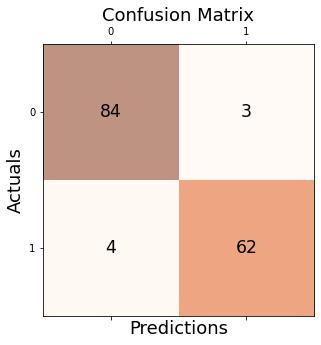

In [239]:
from sklearn.metrics import confusion_matrix
modelSV = SVC(kernel='linear', C=1.0, gamma='auto')
modelSV.fit(X_train1, train_Y1)
y_pred = modelSV.predict(X_validation)
conf_matrix = confusion_matrix(y_true=Y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [240]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
print('Precision: %.3f' % precision_score(Y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(Y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(Y_validation[:,0], y_pred))

Precision: 0.954
Recall: 0.939
Accuracy: 0.954
F1 Score: 0.947


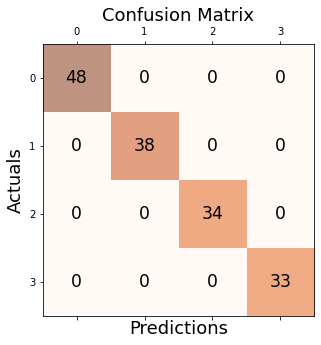

In [241]:
from sklearn.metrics import confusion_matrix
modelSV = SVC(kernel='linear', C=1.0, gamma='auto')
modelSV.fit(X_train1, train_Y2)
y_pred =modelSV.predict(X_validation)
conf_matrix = confusion_matrix(y_true=Y_validation[:,1], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [242]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
print('Precision: %.3f' % precision_score(Y_validation[:,1], y_pred, average='macro'))
print('Recall: %.3f' % recall_score(Y_validation[:,1], y_pred, average='macro'))
print('Accuracy: %.3f' % accuracy_score(Y_validation[:,1], y_pred))
print('F1 Score: %.3f' % f1_score(Y_validation[:,1], y_pred,average='macro'))

Precision: 1.000
Recall: 1.000
Accuracy: 1.000
F1 Score: 1.000


In [243]:
X_train.shape

(609, 70)

In [244]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

#  Random Forest

In [245]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
# define the random forest model
modelRF = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
# define the 5-fold cross validation procedure
cv = KFold(n_splits=5,shuffle=False)
# evaluate the model and collect the scores
train_Y1 =Y_train[:,0]
n_scores = cross_val_score(modelRF, X_train, train_Y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy for Genotype:' + str(np.mean(n_scores)))# + str(np.std(n_scores)))
train_Y2 =Y_train[:,1]
n_scores = cross_val_score(modelRF,X_train, train_Y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy:' + str(np.mean(n_scores))) #+ str(np.std(n_scores)))

Mean Accuracy for Genotype:0.9523777265953124
Mean Accuracy:0.950765478932394


Feature: 0, Score: 0.02844
Feature: 1, Score: 0.00801
Feature: 2, Score: 0.01220
Feature: 3, Score: 0.00597
Feature: 4, Score: 0.01273
Feature: 5, Score: 0.00484
Feature: 6, Score: 0.00911
Feature: 7, Score: 0.02020
Feature: 8, Score: 0.00869
Feature: 9, Score: 0.00508
Feature: 10, Score: 0.00684
Feature: 11, Score: 0.00671
Feature: 12, Score: 0.00476
Feature: 13, Score: 0.01057
Feature: 14, Score: 0.01133
Feature: 15, Score: 0.00612
Feature: 16, Score: 0.00566
Feature: 17, Score: 0.00751
Feature: 18, Score: 0.00459
Feature: 19, Score: 0.00675
Feature: 20, Score: 0.00785
Feature: 21, Score: 0.00510
Feature: 22, Score: 0.00658
Feature: 23, Score: 0.01129
Feature: 24, Score: 0.00566
Feature: 25, Score: 0.13538
Feature: 26, Score: 0.01008
Feature: 27, Score: 0.02720
Feature: 28, Score: 0.02145
Feature: 29, Score: 0.02470
Feature: 30, Score: 0.01506
Feature: 31, Score: 0.02257
Feature: 32, Score: 0.02538
Feature: 33, Score: 0.01303
Feature: 34, Score: 0.01269
Feature: 35, Score: 0.00909
Fe

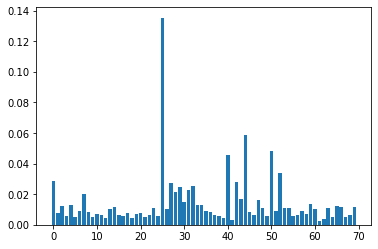

In [246]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
modelRF.fit(X_train1,train_Y1)
importance = modelRF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.04731
Feature: 1, Score: 0.00288
Feature: 2, Score: 0.00369
Feature: 3, Score: 0.00192
Feature: 4, Score: 0.01436
Feature: 5, Score: 0.00929
Feature: 6, Score: 0.03880
Feature: 7, Score: 0.00451
Feature: 8, Score: 0.00664
Feature: 9, Score: 0.00721
Feature: 10, Score: 0.00903
Feature: 11, Score: 0.01053
Feature: 12, Score: 0.01612
Feature: 13, Score: 0.02719
Feature: 14, Score: 0.00338
Feature: 15, Score: 0.00782
Feature: 16, Score: 0.00562
Feature: 17, Score: 0.00435
Feature: 18, Score: 0.00859
Feature: 19, Score: 0.00314
Feature: 20, Score: 0.01645
Feature: 21, Score: 0.00484
Feature: 22, Score: 0.00403
Feature: 23, Score: 0.00449
Feature: 24, Score: 0.00323
Feature: 25, Score: 0.00505
Feature: 26, Score: 0.13790
Feature: 27, Score: 0.00471
Feature: 28, Score: 0.03487
Feature: 29, Score: 0.02055
Feature: 30, Score: 0.02310
Feature: 31, Score: 0.00474
Feature: 32, Score: 0.00438
Feature: 33, Score: 0.03144
Feature: 34, Score: 0.00491
Feature: 35, Score: 0.00564
Fe

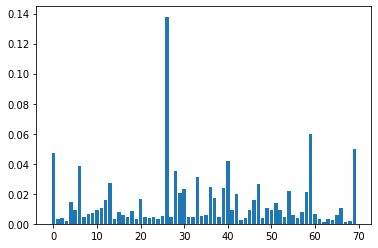

In [247]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
modelRF.fit(X_train1,train_Y2)
importance = modelRF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

after training the data in random forest classifier we got 21 important features which we can use to validate the data and find the accuracy

In [248]:
# Feature Slection
# Create the RFE object and compute a cross-validated score.
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 10  # Minimum number of features to consider
SV = RFECV(estimator=RF,step=1,cv=StratifiedKFold(5),scoring="accuracy",min_features_to_select=10)
SV.fit(X_train1,train_Y1)

print("Optimal number of features : %d" % SV.n_features_)
SV.get_feature_names_out()

Optimal number of features : 52


array(['x0', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x11', 'x12',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x19', 'x20', 'x21', 'x22',
       'x23', 'x24', 'x25', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32',
       'x33', 'x34', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45',
       'x46', 'x47', 'x48', 'x49', 'x50', 'x52', 'x54', 'x58', 'x59',
       'x60', 'x63', 'x64', 'x65', 'x66'], dtype=object)

In [249]:
# Feature Slection
# Create the RFE object and compute a cross-validated score.
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 10  # Minimum number of features to consider
RFC = RFECV(estimator=RF,step=1,cv=StratifiedKFold(5),scoring="accuracy",min_features_to_select=10)
RFC.fit(X_train1,train_Y2)

print("Optimal number of features : %d" % RFC.n_features_)
RFC.get_feature_names_out()

Optimal number of features : 33


array(['x0', 'x4', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x15',
       'x18', 'x20', 'x26', 'x28', 'x29', 'x30', 'x33', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x45', 'x46', 'x47', 'x49',
       'x51', 'x54', 'x58', 'x59', 'x69'], dtype=object)

from the above feature importance and feature elimination we can take some of the common feature and perform validation on it

In [250]:
X_trainf= X_train1.iloc[:, [0,6,7,25,26,27,28,29,30,31,32,33,36,39,40,42,44,47,54,59,69] ] 
print(X_trainf)

           0         6         7         25        26        27        28  \
199 -0.307356  0.429531 -0.924924  0.198718  0.429685  0.643122  1.125372   
599 -0.640269  0.194394  2.639613  0.039434  1.384461  1.818124  1.332519   
436  1.820141 -0.964960  1.195999  2.597300 -0.703213 -0.687651 -1.049125   
90  -0.114082 -0.853915  0.503222  0.164651 -0.770921  0.220585 -0.740056   
371 -0.593729 -0.536422  0.119081 -0.516871  2.049281  1.206310  1.048180   
..        ...       ...       ...       ...       ...       ...       ...   
71  -0.031211 -0.274476 -1.438274 -1.187530 -0.960947 -0.059850  0.117728   
106  1.240016  0.367852  1.987791  1.424198 -0.560679  0.779801  0.042486   
270  1.238636 -0.501531  1.663488  2.469200 -0.433693  1.512460 -0.158872   
435  1.455802 -1.018045  0.602121  1.594917 -0.758373 -0.950497 -1.104782   
102 -0.306749 -1.281200  0.478818  0.609646 -0.594229  0.885910  0.457219   

           29        30        31  ...        33        36        39  \
199

In [251]:
X_validf= X_validation.iloc[:, [0,6,7,25,26,27,28,29,30,31,32,33,36,39,40,42,44,47,54,59,69] ] 

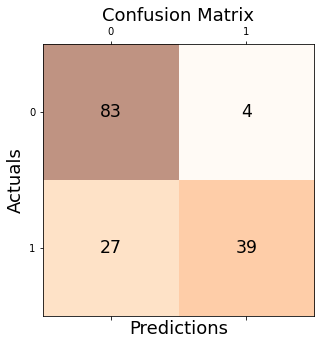

In [252]:
from sklearn.metrics import confusion_matrix
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train1, train_Y1)
y_pred = RF.predict(X_validation)
conf_matrix = confusion_matrix(y_true=Y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [253]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
print('Precision: %.3f' % precision_score(Y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(Y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(Y_validation[:,0], y_pred))

Precision: 0.907
Recall: 0.591
Accuracy: 0.797
F1 Score: 0.716


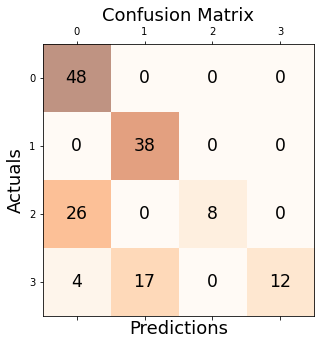

In [254]:
from sklearn.metrics import confusion_matrix
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train1, train_Y2)
y_pred =RF.predict(X_validation)
conf_matrix = confusion_matrix(y_true=Y_validation[:,1], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [255]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
print('Precision: %.3f' % precision_score(Y_validation[:,1], y_pred, average='macro'))
print('Recall: %.3f' % recall_score(Y_validation[:,1], y_pred, average='macro'))
print('Accuracy: %.3f' % accuracy_score(Y_validation[:,1], y_pred))
print('F1 Score: %.3f' % f1_score(Y_validation[:,1], y_pred,average='macro'))

Precision: 0.827
Recall: 0.650
Accuracy: 0.693
F1 Score: 0.623


In [256]:
num_df.iloc[:,37]

0      0.182150
1      0.182086
2      0.184388
3      0.161768
4      0.160200
         ...   
757    0.214110
758    0.212616
759    0.184062
760    0.196025
761    0.196433
Name: NUMB_N, Length: 762, dtype: float64

reference:https://machinelearningmastery.com/calculate-feature-importance-with-python/

# Neural Network

In [335]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
# define the random forest model
modelNN = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', alpha=0.05)
#model.out_activation_='softmax'
# define the 5-fold cross validation procedure
cv = KFold(n_splits=5,shuffle=False)
# evaluate the model and collect the scores
train_Y1 =Y_train[:,0]
n_scores = cross_val_score(modelNN, X_train, train_Y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy for Genotype:' + str(np.mean(n_scores)) )#+ str(np.std(n_scores)))
train_Y2 =Y_train[:,1]
n_scores = cross_val_score(modelNN, X_train, train_Y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy:' + str(np.mean(n_scores)))#+ str(np.std(n_scores)))

Mean Accuracy for Genotype:0.9950819672131148
Mean Accuracy:0.993415526351443


In [336]:
from sklearn.svm import SVC
train_Y1 =Y_train[:,0]
clf_1 =MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
clf_1.fit(X_train1,train_Y1)
y_lr = clf_1.predict(X_train1)
clf_1.score(X_train1, np.ravel(train_Y1))

1.0

In [337]:
from sklearn.svm import SVC
train_Y1 =Y_train[:,0]
clf_2 =MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
clf_2.fit(X_train1,train_Y2)
y_lr = clf_2.predict(X_train1)
clf_2.score(X_train1, np.ravel(train_Y2))

1.0

In [340]:
from sklearn.inspection import permutation_importance

clf = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01).fit(X_train1, train_Y1)
result = permutation_importance(clf, X_train1, train_Y1, n_repeats=10,random_state=0)
std_1= result.importances_std
print(std_1)

[0.00254913 0.         0.         0.00075248 0.00080443 0.
 0.         0.00105142 0.         0.         0.00049261 0.
 0.00088426 0.         0.         0.00065681 0.         0.
 0.00105142 0.         0.00049261 0.         0.         0.00297838
 0.         0.00756229 0.         0.00182849 0.         0.
 0.00353705 0.00180624 0.00154909 0.00075248 0.         0.00328817
 0.         0.00128247 0.00080443 0.00049261 0.         0.
 0.         0.         0.00128247 0.00049261 0.         0.00049261
 0.00049261 0.         0.         0.         0.00186499 0.00082102
 0.         0.         0.00176853 0.00110151 0.         0.00150495
 0.         0.00080443 0.         0.         0.         0.00447888
 0.         0.         0.         0.00105142]


In [341]:
res_1 = [idx for idx, val in enumerate(std_1) if val != 0]
print("Indices of Non-Zero elements : " + str(res_1))

Indices of Non-Zero elements : [0, 3, 4, 7, 10, 12, 15, 18, 20, 23, 25, 27, 30, 31, 32, 33, 35, 37, 38, 39, 44, 45, 47, 48, 52, 53, 56, 57, 59, 61, 65, 69]


In [342]:
from sklearn.inspection import permutation_importance

clf = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01).fit(X_train1, train_Y2)
result = permutation_importance(clf, X_train1, train_Y2, n_repeats=10,random_state=0)
std_2= result.importances_std
print(std_2)

[0.00105142 0.         0.         0.00110151 0.         0.00105142
 0.00164204 0.00098522 0.00105142 0.00073434 0.         0.00049261
 0.         0.00136398 0.00049261 0.00080443 0.         0.
 0.00049261 0.00049261 0.         0.00114943 0.00075248 0.
 0.00049261 0.00154909 0.00146868 0.00143149 0.         0.
 0.         0.         0.00065681 0.00075248 0.         0.00194981
 0.         0.         0.00241329 0.         0.00049261 0.
 0.         0.00065681 0.00065681 0.         0.00143149 0.
 0.         0.00167455 0.00080443 0.00114943 0.00049261 0.00049261
 0.00110151 0.         0.00075248 0.00098522 0.00049261 0.00164204
 0.         0.         0.         0.         0.         0.
 0.00075248 0.         0.00075248 0.        ]


In [343]:
res_2 = [idx for idx, val in enumerate(std_2) if val != 0]
print("Indices of Non-Zero elements : " + str(res_2))

Indices of Non-Zero elements : [0, 3, 5, 6, 7, 8, 9, 11, 13, 14, 15, 18, 19, 21, 22, 24, 25, 26, 27, 32, 33, 35, 38, 40, 43, 44, 46, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 66, 68]


In [344]:
print(np.union1d(res_1, res_2))

[ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 20 21 22 23 24 25 26 27
 30 31 32 33 35 37 38 39 40 43 44 45 46 47 48 49 50 51 52 53 54 56 57 58
 59 61 65 66 68 69]


In [361]:
X_train_df= X_train1.iloc[:, [ 0,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22 ,23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 37, 38, 39, 40, 43, 44, 45, 46, 47 ,48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 61, 65, 66, 68, 69]]


In [362]:
X_validate_df=X_validation.iloc[:,[ 0,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22 ,23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 37, 38, 39, 40, 43, 44, 45, 46, 47 ,48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 61, 65, 66, 68, 69]]

In [363]:
Y_validate_df1=Y_validation[:,0]
Y_validate_df2=Y_validation[:,1]

In [364]:
# define model
model = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
# fit model
model.fit(X_train_df, train_Y1)
# make predictions
yhat = model.predict(X_validate_df)
# evaluate predictions
accuracy = accuracy_score(Y_validate_df1, yhat)
print('Accuracy: %.3f' % (accuracy * 100))

Accuracy: 99.346


In [365]:
# define model
model = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
# fit model
model.fit(X_train_df, train_Y1)
# make predictions
yhat = model.predict(X_validate_df)
# evaluate predictions
accuracy = accuracy_score(Y_validate_df2, yhat)
print('Accuracy: %.3f' % (accuracy * 100))

Accuracy: 33.333


# Recursive feature elimination

**From above four models after training and validation of data we found Accuracy and F1 Score**  
**On the basis of that we have choose (Elastic Net logistic regression For "Genotype") and (SVM model for "Treatement Behaviour")**

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


X, Y = make_classification(
    n_samples=762,
    n_features=70,
    n_informative=30,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=4,
    random_state=0,
)
# Create the RFE object and compute a cross-validated score.
modelSV = SVC(kernel='linear', C=1.0, gamma='auto')
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 10  # Minimum number of features to consider
SV = RFECV(
    estimator=modelSV,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
SV.fit(X_train1,train_Y1)
print("Optimal number of features wrt Treatment behaviour : %d" % SV.n_features_)
SV.get_feature_names_out()

Optimal number of features wrt Treatment behaviour : 38


array(['x0', 'x2', 'x4', 'x6', 'x7', 'x10', 'x11', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x23', 'x25', 'x27', 'x28', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x38', 'x40', 'x42', 'x43',
       'x46', 'x48', 'x49', 'x52', 'x55', 'x58', 'x59', 'x60', 'x65',
       'x69'], dtype=object)

With RFECV for "Genotype" we got 35 Optimal no. of features using Elastic Net Model

In [162]:
X, Y = make_classification(
    n_samples=762,
    n_features=70,
    n_informative=30,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=4,
    random_state=0,
)
# Create the RFE object and compute a cross-validated score.
modelSV = SVC(kernel='linear', C=1.0, gamma='auto')
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 10  # Minimum number of features to consider
SV = RFECV(
    estimator=modelSV,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
SV.fit(X_train1,train_Y2)
print("Optimal number of features wrt Treatment behaviour : %d" % SV.n_features_)
SV.get_feature_names_out()

Optimal number of features wrt Treatment behaviour : 62


array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38',
       'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x58',
       'x59', 'x60', 'x62', 'x63', 'x67', 'x69'], dtype=object)

With RFECV for "Treatement Behaviour" we got 62 Optimal no. of features using SVM Model

# Testing Model

**Using above optimal features we will test our model for "Genotype" and "Treatment Behavior"**

In [292]:
X_test_model=test_df4
Y_test_model=np.array(test_df3.loc[:,'Genotype':'Treatment_Behavior'])
X_train_model=X_train1

In [371]:
X_train_model1= X_train_model.iloc[:, [0, 1, 2, 4, 6, 10, 14, 16, 17, 18, 19, 23, 25, 27, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 44, 46, 48, 52, 54, 55, 56, 59, 60, 65, 69]]

In [372]:
Y_test_model1 =Y_test_model[:,0]

In [373]:
X_test_model1= X_test_model.iloc[:, [0, 1, 2, 4, 6, 10, 14, 16, 17, 18, 19, 23, 25, 27, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 44, 46, 48, 52, 54, 55, 56, 59, 60, 65, 69]]

In [374]:
from sklearn.metrics import confusion_matrix
modelEN = LogisticRegression(C=0.6, penalty="elasticnet", solver="saga", l1_ratio=0.2,max_iter=100)
modelEN.fit(X_train_model, train_Y1)
y_pred = modelEN.predict(X_test1_model1)

c:\users\rohan\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [377]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
print('Precision: %.3f' % precision_score(Y_test1_model1, y_pred))
print('Recall: %.3f' % recall_score(Y_test1_model1, y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test1_model1, y_pred))
print('F1 Score: %.3f' % f1_score(Y_test1_model1, y_pred))

Precision: 0.969
Recall: 0.955
Accuracy: 0.967
F1 Score: 0.962


In [327]:
X_test_model0=test_df
Y_test_model0=np.array(test_df.loc[:,'Genotype':'Treatment_Behavior'])
X_train_model=X_train1

In [321]:
X_train_model2= X_train_model.iloc[:, [0, 1, 2, 3, 4, 5,6,7, 8 , 9 ,10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38,39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55,56,58,59, 60, 62, 63, 67, 69]]

In [331]:
Y_test_model2 =Y_test_model[:,1]
X_test_model2= X_test_model.iloc[:, [0, 1, 2, 3, 4, 5,6,7, 8 , 9 ,10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38,39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55,56,58,59, 60, 62, 63, 67, 69]]

In [332]:
X_test_model2.shape

(225, 62)

In [379]:
from sklearn.metrics import confusion_matrix
modelSV2 = SVC(kernel='linear', C=1.0, gamma='auto')
modelSV.fit(X_train_model2, train_Y2)
y_pred = modelSV.predict(X_test_model2)

 


c:\users\rohan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [380]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
print('Precision: %.3f' % precision_score(Y_test_model2, y_pred, average='macro'))
print('Recall: %.3f' % recall_score(Y_test_model2, y_pred, average='macro'))
print('Accuracy: %.3f' % accuracy_score(Y_test_model2, y_pred))
print('F1 Score: %.3f' % f1_score(Y_test_model2, y_pred,average='macro'))

Precision: 0.584
Recall: 0.449
Accuracy: 0.476
F1 Score: 0.362


c:\users\rohan\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Upon Testing data after recursive elimination we are getting good accuracy for "Genotype" and less accuracy for "Treatment behaviour"**